# Convolutional Neural Networks


**Notasi**:
- Superscript $[l]$ menunjukkan objek dari lapisan $l^{th}$.
    - Contoh: $a^{[4]}$ adalah aktivasi layer $4^{th}$. $W^{[5]}$ dan $b^{[5]}$ adalah parameter lapisan $5^{th}$.


- Superscript $(i)$ menunjukkan objek dari data ke $i^{th}$.
    - Contoh: $x^{(i)}$ adalah input data pelatihan $i^{th}$.
    
    
- Subscript $i$ menunjukkan entri $i^{th}$ dari sebuah vektor.
    - Contoh: $a^{[l]}_i$ menunjukkan entri $i^{th}$ dari aktivasi di lapisan $l$, dengan asumsi ini adalah lapisan yang terhubung sepenuhnya (FC).
    
    
- $n_H$, $n_W$ dan $n_C$ masing-masing menunjukkan tinggi, lebar dan jumlah saluran dari lapisan tertentu. Jika Anda ingin mereferensikan lapisan tertentu $l$, Anda juga dapat menulis $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$.
- $n_{H_{prev}}$, $n_{W_{prev}}$ dan $n_{C_{prev}}$ masing-masing menunjukkan tinggi, lebar dan jumlah saluran dari lapisan sebelumnya. Jika merujuk pada lapisan tertentu $l$, ini juga bisa dilambangkan dengan $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$.


<a name='1'></a>
## Packages

Mari kita impor terlebih dahulu semua packages yang Anda perlukan selama penugasan ini.
- [numpy](www.numpy.org) adalah package dasar untuk komputasi ilmiah dengan Python.
- [matplotlib](http://matplotlib.org) adalah library untuk memplot grafik dengan Python.
- np.random.seed(1) digunakan untuk menjaga semua pemanggilan fungsi random tetap konsisten. 

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

<a name='2'></a>
## Outline

Anda akan menerapkan blok penyusun convolutional neural network! Setiap fungsi yang akan Anda terapkan akan memiliki petunjuk terperinci untuk memandu Anda melalui langkah-langkahnya:

- Fungsi konvolusi, antara lain:
    - Zero Padding
    - Convolve window 
    - Convolution forward
    
- Fungsi pooling, antara lain:
    - Pooling forward
    - Create mask 
    - Distribute value
    
Notebook ini akan menuntun Anda untuk mengimplementasikan fungsi-fungsi ini dari awal di `numpy`. 

<img src="images/model.png" style="width:800px;height:300px;">

**Catatan**: Untuk setiap fungsi forward, ada persamaan backward yang sesuai. Oleh karena itu, pada setiap langkah modul forward, Anda akan menyimpan beberapa parameter dalam cache. Parameter ini digunakan untuk menghitung gradien selama propagasi backward.

<a name='3'></a>
## Convolutional Neural Networks

Meskipun kerangka pemrograman membuat konvolusi mudah digunakan, konvolusi tetap menjadi salah satu konsep tersulit untuk dipahami dalam deep learning. Lapisan konvolusi mengubah volume input menjadi volume output dengan ukuran berbeda, seperti yang ditunjukkan di bawah ini.

<img src="images/conv_nn.png" style="width:350px;height:200px;">

Di bagian ini, Anda akan membangun setiap langkah lapisan konvolusi. Pertama-tama Anda akan mengimplementasikan dua fungsi pembantu: satu untuk zero padding dan yang lainnya untuk menghitung fungsi konvolusi itu sendiri.

<a name='3-1'></a>
### Zero-padding

Zero-padding menambahkan angka nol di sekitar batas gambar:

<img src="images/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> <b>Gambar 1</b> </u><font color='purple'> : <b>Zero-Padding</b><br> Gambar (3 saluran, RGB) dengan padding 2. </center></caption>

Manfaat utama padding adalah:

- Memungkinkan Anda menggunakan lapisan CONV tanpa harus mengecilkan tinggi dan lebar volume. Hal ini penting untuk membangun deep network, karena jika tidak, tinggi/lebar akan menyusut saat Anda masuk ke lapisan yang lebih dalam. Kasus khusus yang penting adalah konvolusi yang "sama", di mana tinggi/lebar dipertahankan secara tepat setelah satu lapisan.

- Ini membantu kita menyimpan lebih banyak informasi di batas gambar. Tanpa padding, sangat sedikit nilai pada lapisan berikutnya yang akan terpengaruh oleh pixel di tepi gambar.

<a name='ex-1'></a>
### Tugas 1 - zero_pad
Terapkan fungsi berikut, yang mengisi semua gambar kumpulan contoh X dengan nol. Gunakan [np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html). Perhatikan jika Anda ingin mengisi array "a" berbentuk $(5,5,5,5,5)$ dengan `pad = 1` untuk dimensi ke-2, `pad = 3` untuk dimensi ke-4 dan `pad = 0` untuk dimensi lainnya, Anda akan melakukan:
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))
```

In [2]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    
    #(≈ 1 line)
    # X_pad = None
    # YOUR CODE STARTS HERE
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0,0))
    
    # YOUR CODE ENDS HERE
    
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
All tests passed!


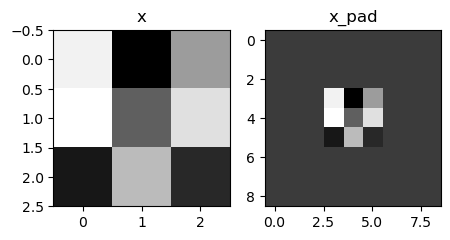

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
zero_pad_test(zero_pad)

<a name='3-2'></a>
### Satu Langkah Konvolusi

Di bagian ini, terapkan satu langkah konvolusi, di mana Anda menerapkan filter ke satu posisi input. Ini akan digunakan untuk membangun unit konvolusional, yang:

- Mengambil volume input
- Menerapkan filter di setiap posisi input
- Menghasilkan volume lain (biasanya dengan ukuran berbeda)

<img src="images/Convolution_schematic.gif" style="width:500px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Gambar 2</b> </u><font color='purple'> : <b>Convolution operation</b><br> dengan filter 3x3 dan langkah 1 (langkah = jumlah Anda memindahkan window setiap kali Anda menggeser) </center></caption>

Dalam aplikasi computer vision, setiap nilai dalam matriks di sebelah kiri berhubungan dengan satu nilai pixel. Anda menggabungkan filter 3x3 dengan gambar dengan mengalikan nilainya berdasarkan elemen dengan matriks asli, lalu menjumlahkannya dan menambahkan bias. Pada langkah pertama latihan ini, Anda akan menerapkan satu langkah konvolusi, yang terkait dengan penerapan filter ke salah satu posisi saja untuk mendapatkan satu output bernilai nyata.

Nanti di notebook ini, Anda akan menerapkan fungsi ini ke beberapa posisi input untuk mengimplementasikan operasi konvolusional penuh.

<a name='ex-2'></a>
### Tugas 2 - conv_single_step()
Terapkan `conv_single_step()`.
    
[Petunjuk](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).

**Catatan**: Variabel b akan diteruskan sebagai array numpy. Jika Anda menambahkan skalar (float atau integer) ke array numpy, hasilnya adalah array numpy. Dalam kasus khusus array numpy yang berisi nilai tunggal, Anda dapat melemparkannya sebagai float untuk mengubahnya menjadi skalar.

In [4]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    #(≈ 3 lines of code)
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    # s = None
    # Sum over all entries of the volume s.
    # Z = None
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    # Z = None
    # YOUR CODE STARTS HERE
    
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = a_slice_prev * W
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    
    
    # YOUR CODE ENDS HERE

    return Z

In [5]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)
conv_single_step_test(conv_single_step)

assert (type(Z) == np.float64 or type(Z) == np.float32), "You must cast the output to float"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221
All tests passed!


<a name='3-3'></a>
### Convolutional Neural Networks - Forward Pass

Dalam forward pass, Anda akan mengambil banyak filter dan menggabungkannya pada input. Setiap 'konvolusi' memberi Anda output matriks 2D. Anda kemudian akan menumpuk output ini untuk mendapatkan volume 3D:

<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<a name='ex-3'></a>
### Tugas 3 - conv_forward
Terapkan fungsi di bawah ini untuk menggabungkan filter `W` pada aktivasi input `A_prev`.
Fungsi ini mengambil input berikut:
*`A_prev`, output aktivasi oleh lapisan sebelumnya (untuk batch dari m input);* Bobot dilambangkan dengan `W`. Ukuran window filter adalah `f` kali `f`.
*Vektor biasnya adalah `b`, di mana setiap filter memiliki biasnya sendiri (tunggal).

Anda juga memiliki akses ke dictionary hyperparameter, yang berisi langkah dan padding. **Petunjuk**:
1. Untuk memilih irisan 2x2 di sudut kiri atas matriks "a_prev" (bentuk (5,5,3)), Anda dapat melakukan:
``` python
a_slice_prev = a_prev[0:2,0:2,:]
```
Perhatikan bagaimana hal ini menghasilkan irisan 3D yang memiliki tinggi 2, lebar 2, dan kedalaman 3. Kedalaman adalah jumlah channels.
Ini akan berguna ketika Anda mendefinisikan `a_slice_prev` di bawah, menggunakan indeks `start/end` yang akan Anda tentukan.

2. Untuk mendefinisikan a_slice Anda harus terlebih dahulu menentukan sudutnya `vert_start`, `vert_end`, `horiz_start` dan `horiz_end`. Gambar ini mungkin berguna bagi Anda untuk mengetahui bagaimana masing-masing sudut dapat didefinisikan menggunakan h, w, f dan s pada code di bawah.

<img src="images/vert_horiz_kiank.png" style="width:400px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Gambar 3</b> </u><font color='purple'> : <b>Definisi dari sebuah slice menggunakan vertical dan horizontal start/end (dengan sebuah 2x2 filter)</b> <br> Gambar ini hanya menampilkan satu saluran. 
    
Rumus yang menghubungkan bentuk output konvolusi dengan bentuk input adalah:
    
$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_C = \text{number of filters used in the convolution}$$
    




Untuk latihan ini, jangan khawatir tentang vektorisasi! Implementasikan saja semuanya dengan for-loop.

#### Petunjuk Tambahan (jika Anda buntu):


* Gunakan array slicing (misalnya`varname[0:1,:,3:5]`) untuk variabel berikut:
  `a_prev_pad` ,`W`, `b`
  - Salin code awal dari fungsi dan jalankan di luar fungsi yang ditentukan, di sel terpisah.
  - Periksa apakah subset setiap array memiliki ukuran dan dimensi yang Anda harapkan.
  
* Untuk memutuskan cara mendapatkan `vert_start`, `vert_end`, `horiz_start`, `horiz_end`, ingatlah bahwa ini adalah indeks dari lapisan sebelumnya .
  - Gambarkan contoh lapisan pad sebelumnya (misalnya 8 x 8), dan lapisan saat ini (lapisan output) (2 x 2, misalnya).
  - Indeks lapisan output dilambangkan dengan `h` dan `w`.
* Pastikan `a_slice_prev` memiliki tinggi, lebar, dan kedalaman.
* Ingatlah bahwa `a_prev_pad` adalah subset dari `A_prev_pad`.
  - Pikirkan mana yang harus digunakan dalam for loops.

In [6]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    # (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Retrieve dimensions from W's shape (≈1 line)
    # (f, f, n_C_prev, n_C) = None
    
    # Retrieve information from "hparameters" (≈2 lines)
    # stride = None
    # pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. (≈2 lines)
    # n_H = None
    # n_W = None
    
    # Initialize the output volume Z with zeros. (≈1 line)
    # Z = None
    
    # Create A_prev_pad by padding A_prev
    # A_prev_pad = None
    
    # for i in range(None):               # loop over the batch of training examples
        # a_prev_pad = None               # Select ith training example's padded activation
        # for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            # vert_start = None
            # vert_end = None
            
            # for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                # horiz_start = None
                # horiz_end = None
                
                # for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    # a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    # weights = None
                    # biases = None
                    # Z[i, h, w, c] = None
    
    # YOUR CODE STARTS HERE
    
    # Retrieve dimensions from A_prev's shape 
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation.
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros.
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    weights = W[:, :, :, c]
                    biases = b[:,:,:, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights,biases)
    
    # YOUR CODE ENDS HERE
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [7]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[0,2,1] =\n", Z[0, 2, 1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

conv_forward_test(conv_forward)


Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]
All tests passed!


Lapisan CONV juga harus berisi aktivasi, dalam hal ini Anda akan menambahkan baris code berikut:

```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ...
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```

Namun Anda tidak perlu melakukannya di sini.

<a name='4'></a>
## Pooling Layer

Lapisan pooling (POOL) mengurangi tinggi dan lebar input. Ini membantu mengurangi komputasi, serta membantu membuat detektor fitur lebih invarian terhadap posisinya dalam input. Dua jenis lapisan pooling adalah:

- Lapisan max-pooling: menggeser window ($f, f$) sepanjang input dan menyimpan nilai maksimal window di output.

- Lapisan average-pooling: menggeser window ($f, f$) sepanjang input dan menyimpan nilai rata-rata window di output.

<table>
<td>
<img src="images/max_pool1.png" style="width:500px;height:300px;">
<td>

<td>
<img src="images/a_pool.png" style="width:500px;height:300px;">
<td>
</table>

Lapisan pooling ini tidak memiliki parameter untuk melatih propagasi backward. Namun, mereka memiliki hyperparameter seperti ukuran window $f$. Ini menentukan tinggi dan lebar window $f \times f$ yang akan Anda hitung *max* atau *average*.

<a name='4-1'></a>
### Forward Pooling
Sekarang, Anda akan mengimplementasikan MAX-POOL dan AVG-POOL, dalam fungsi yang sama.

<a name='ex-4'></a>
### Tugas 4 - pool_forward

Implementasikan forward pass dari pooling layer. Ikuti petunjuk di komentar di bawah.

**Pengingat**:
Karena tidak ada padding, rumus yang mengatur bentuk output dari pooling ke bentuk input adalah:

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_C = n_{C_{prev}}$$

In [8]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    # for i in range(None):                         # loop over the training examples
        # for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            # vert_start = None
            # vert_end = None
            
            # for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                # horiz_start = None
                # horiz_end = None
                
                # for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    # a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    # if mode == "max":
                        # A[i, h, w, c] = None
                    # elif mode == "average":
                        # A[i, h, w, c] = None
    
    # YOUR CODE STARTS HERE
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # YOUR CODE ENDS HERE
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    #assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [9]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])

pool_forward_test(pool_forward)

mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
All tests passed!


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [11]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

pool_forward_test(pool_forward)

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
All tests passed!


**Expected Output:**
    
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
```

<font color='blue'>
    
**Yang harus Anda ingat**:

* Konvolusi mengekstrak fitur dari gambar input dengan mengambil dot product antara data input dan array bobot 3D (filter).
* Output 2D dari konvolusi disebut feature map
* Lapisan konvolusi adalah tempat filter digeser sepanjang gambar dan menghitung dot product
* Ini mengubah volume input menjadi volume output dengan ukuran berbeda
* Zero padding membantu menyimpan lebih banyak informasi pada batas gambar, dan berguna untuk membangun deeper networks, karena Anda dapat membuat lapisan CONV tanpa memperkecil tinggi dan lebar volume
* Lapisan pooling secara bertahap mengurangi tinggi dan lebar input dengan menggeser window 2D ke setiap wilayah tertentu, lalu merangkum fitur-fitur di wilayah tersebut